# Neural Networks Made Simple 🧠

**A Beginner-Friendly Guide to PyTorch Neural Networks**

This notebook breaks down neural networks into simple, easy-to-understand pieces with lots of visuals!

## What You'll Learn:
1. What is a neural network? (Simple explanation)
2. How do they learn? (Training loop and backpropagation)
3. How to train them? (Step-by-step training loop)
4. Which optimizer to use? (SGD vs Adam - simple comparison)
5. How to prevent overfitting? (Dropout explained simply)


In [ ]:
# Step 1: Install and import everything we need
# Note: Run this cell first to install required packages
%pip install torch matplotlib numpy scikit-learn -q

# Import PyTorch and neural network modules
import torch
import torch.nn as nn  # Neural network layers
import torch.optim as optim  # Optimizers (SGD, Adam, etc.)

# Import data science libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility (so results are consistent)
torch.manual_seed(42)
np.random.seed(42)

print("✅ All libraries loaded successfully!")
print(f"PyTorch version: {torch.__version__}")
print("Ready to build neural networks!")


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
✅ All libraries loaded successfully!
PyTorch version: 2.8.0
Ready to build neural networks!


---

## Part 1: What is a Neural Network? 🤔

Think of a neural network like a **smart calculator** that learns patterns from data.

### Simple Analogy:
- **Input**: What you see (like a picture of a cat)
- **Neural Network**: Your brain processing it
- **Output**: What you recognize ("That's a cat!")

Let's start with the simplest building block: a **Perceptron**


Inputs:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

Targets (AND gate):
tensor([0., 0., 0., 1.])


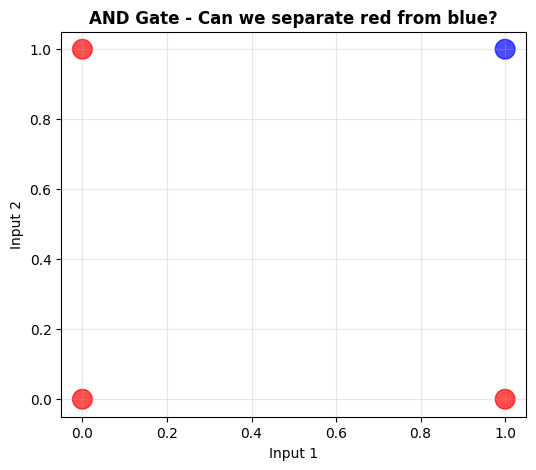


💡 A single line can separate red from blue - perceptron can learn this!


In [ ]:
# A perceptron is like a single decision maker
# It takes inputs, multiplies by weights, adds bias, and makes a decision

# Simple example: Can a perceptron learn the AND gate?
# AND gate: Both inputs must be 1 to get output 1

inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([0, 0, 0, 1], dtype=torch.float32)  # AND gate

print("Inputs:")
print(inputs)
print("\nTargets (AND gate):")
print(targets)

# Visualize
plt.figure(figsize=(6, 5))
colors = ['red' if t == 0 else 'blue' for t in targets]
plt.scatter(inputs[:, 0], inputs[:, 1], c=colors, s=200, alpha=0.7)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('AND Gate - Can we separate red from blue?', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 A single line can separate red from blue - perceptron can learn this!")


---

### But what about XOR? (The Famous Problem)

XOR is trickier - you **cannot** separate it with a single line!

**XOR (Exclusive OR)**: Output is 1 when inputs are **different**, 0 when they're the same.

This is why we need **multiple layers** - a single perceptron can't solve XOR!


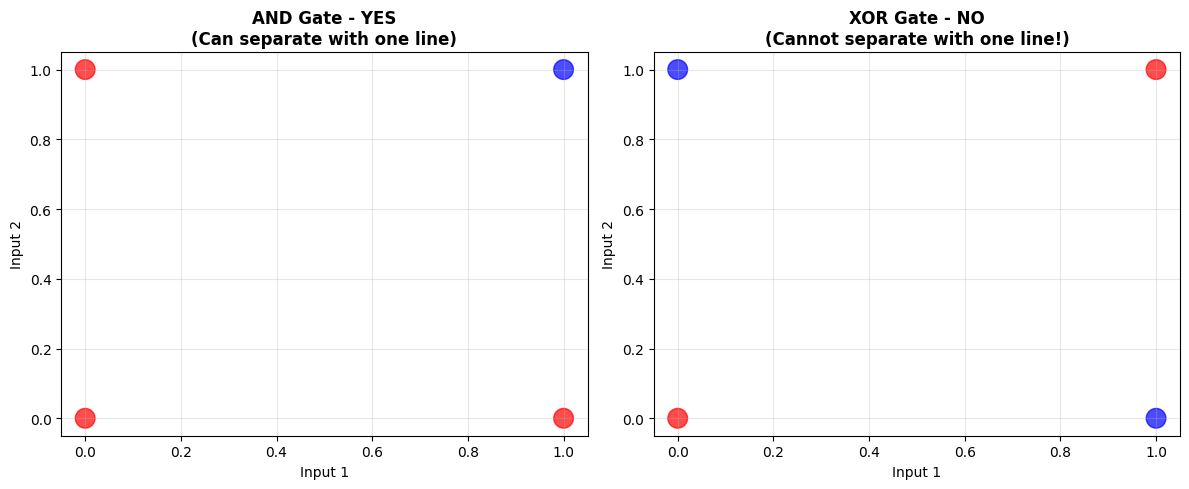


💡 Key Insight: A single perceptron can solve AND, but NOT XOR!
💡 Solution: Use MULTIPLE perceptrons (neural network) to solve XOR!


In [ ]:
# XOR problem: Output is 1 when inputs are different
xor_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_targets = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

plt.figure(figsize=(12, 5))

# AND gate (can be separated with one line)
plt.subplot(1, 2, 1)
colors_and = ['red' if t == 0 else 'blue' for t in targets]
plt.scatter(inputs[:, 0], inputs[:, 1], c=colors_and, s=200, alpha=0.7)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('AND Gate - YES\n(Can separate with one line)', fontweight='bold')
plt.grid(True, alpha=0.3)

# XOR gate (cannot be separated with one line)
plt.subplot(1, 2, 2)
colors_xor = ['red' if t == 0 else 'blue' for t in xor_targets]
plt.scatter(xor_inputs[:, 0], xor_inputs[:, 1], c=colors_xor, s=200, alpha=0.7)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate - NO\n(Cannot separate with one line!)', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: A single perceptron can solve AND, but NOT XOR!")
print("💡 Solution: Use MULTIPLE perceptrons (neural network) to solve XOR!")


---

## Part 2: Activation Functions - Making Networks Smart 🎯

Activation functions add **non-linearity** - without them, multiple layers are useless!

### The Big 3:
1. **ReLU**: Most popular (simple and fast)
2. **Tanh**: Smooth alternative
3. **Sigmoid**: Classic choice


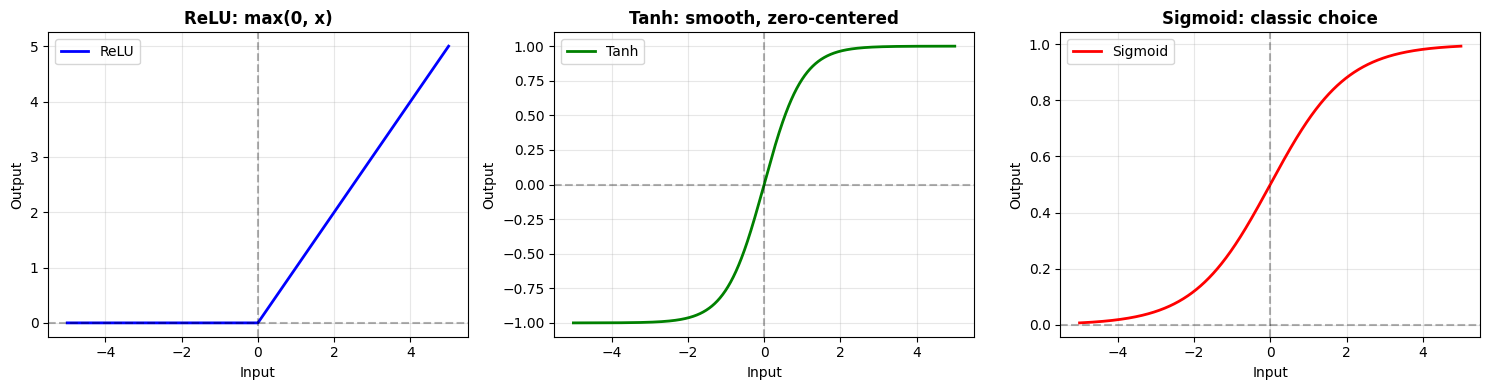


💡 ReLU is the most popular - it's simple and works great!


In [ ]:
# Create input values
x = torch.linspace(-5, 5, 1000)

# Compute activations
relu = torch.relu(x)
tanh = torch.tanh(x)
sigmoid = torch.sigmoid(x)

# Convert to numpy for plotting
x_np = x.detach().numpy()

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# ReLU
axes[0].plot(x_np, relu.detach().numpy(), 'b-', linewidth=2, label='ReLU')
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].set_title('ReLU: max(0, x)', fontweight='bold')
axes[0].set_xlabel('Input')
axes[0].set_ylabel('Output')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Tanh
axes[1].plot(x_np, tanh.detach().numpy(), 'g-', linewidth=2, label='Tanh')
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1].set_title('Tanh: smooth, zero-centered', fontweight='bold')
axes[1].set_xlabel('Input')
axes[1].set_ylabel('Output')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Sigmoid
axes[2].plot(x_np, sigmoid.detach().numpy(), 'r-', linewidth=2, label='Sigmoid')
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[2].set_title('Sigmoid: classic choice', fontweight='bold')
axes[2].set_xlabel('Input')
axes[2].set_ylabel('Output')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n💡 ReLU is the most popular - it's simple and works great!")


---

## Part 3: Building Your First Neural Network 🏗️

Let's create a simple network step by step!


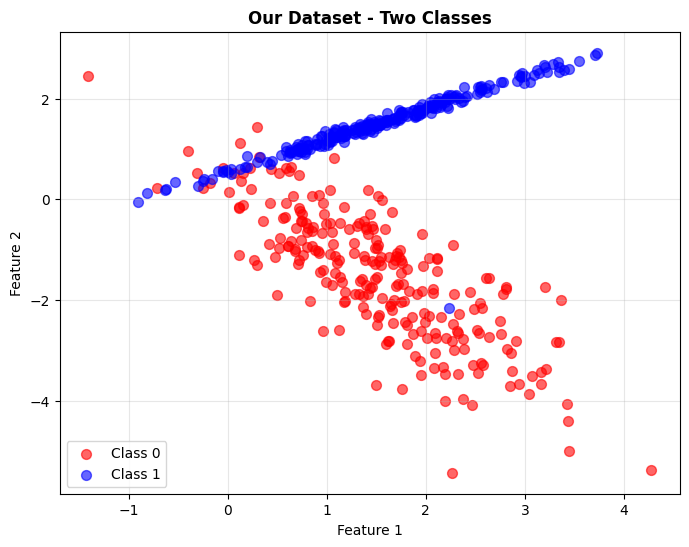

Training samples: 400
Test samples: 100


In [ ]:
# Step 1: Create a simple dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           random_state=42, class_sep=1.5)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', alpha=0.6, label='Class 0', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', alpha=0.6, label='Class 1', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Our Dataset - Two Classes', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


In [ ]:
# Step 2: Create a simple neural network
# Input (2 features) -> Hidden (10 neurons) -> Output (2 classes)

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Layer 1: 2 inputs -> 10 hidden neurons
        self.layer1 = nn.Linear(2, 10)
        # Activation
        self.relu = nn.ReLU()
        # Layer 2: 10 hidden -> 2 outputs
        self.layer2 = nn.Linear(10, 2)

    def forward(self, x):
        # Forward pass: input flows through layers
        x = self.layer1(x)  # Linear transformation
        x = self.relu(x)    # Activation (adds non-linearity)
        x = self.layer2(x)   # Final output
        return x

# Create the network
model = SimpleNet()
print("Our Neural Network:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")


Our Neural Network:
SimpleNet(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=2, bias=True)
)

Total parameters: 52


---

## Part 4: Training Loop - The Heart of Deep Learning ❤️

### How Neural Networks Learn (Backpropagation)

Training a neural network is like teaching it:
1. **Show it data** (forward pass) - Network makes predictions
2. **Check how wrong it is** (calculate loss) - Compare predictions to truth
3. **Learn from mistakes** (backward pass) - Calculate gradients (how to improve)
4. **Update weights** (optimizer step) - Adjust network parameters

**Repeat many times!** Each iteration makes the network better.

### The Magic: Backpropagation
- **Forward pass**: Data flows through network → predictions
- **Backward pass**: Errors flow backward → gradients tell us how to update weights
- PyTorch does this automatically with `loss.backward()`!


In [ ]:
# ===== SETUP =====
# Loss function: Measures how wrong our predictions are
criterion = nn.CrossEntropyLoss()

# Optimizer: Updates weights to reduce loss (Adam is a smart optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # lr = learning rate (step size)

# ===== TRAINING LOOP =====
num_epochs = 100
train_losses = []  # Track training loss over time
train_accs = []     # Track training accuracy
test_losses = []    # Track test loss
test_accs = []      # Track test accuracy

print("🚀 Training started...\n")
print("This will take a moment. Watch how loss decreases and accuracy increases!\n")

for epoch in range(num_epochs):
    # ===== TRAINING PHASE =====
    model.train()  # Set to training mode (important for dropout, batch norm, etc.)

    # Step 1: Forward pass - make predictions
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # Calculate how wrong we are

    # Step 2: Backward pass - calculate gradients
    optimizer.zero_grad()  # Clear old gradients (IMPORTANT: don't forget this!)
    loss.backward()        # Calculate gradients (backpropagation happens here!)
    optimizer.step()       # Update weights using gradients

    # Calculate training accuracy
    _, predicted = torch.max(outputs.data, 1)  # Get predicted class
    train_acc = (predicted == y_train).float().mean()  # Calculate accuracy

    # Store metrics
    train_losses.append(loss.item())
    train_accs.append(train_acc.item())

    # ===== TESTING PHASE =====
    model.eval()  # Set to evaluation mode (turns off dropout, etc.)
    with torch.no_grad():  # Don't calculate gradients (saves memory and time!)
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_acc = (test_predicted == y_test).float().mean()

        test_losses.append(test_loss.item())
        test_accs.append(test_acc.item())

    # Print progress every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"  Train Loss: {loss.item():.4f}, Train Acc: {train_acc.item():.4f}")
        print(f"  Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc.item():.4f}\n")

print("✅ Training complete!")
print(f"🎉 Final Test Accuracy: {test_accs[-1]:.2%}")


🚀 Training started...

This will take a moment. Watch how loss decreases and accuracy increases!

Epoch 20/100
  Train Loss: 0.2769, Train Acc: 0.9275
  Test Loss: 0.2629, Test Acc: 0.9600

Epoch 40/100
  Train Loss: 0.1467, Train Acc: 0.9500
  Test Loss: 0.1487, Test Acc: 0.9300

Epoch 60/100
  Train Loss: 0.1205, Train Acc: 0.9575
  Test Loss: 0.1236, Test Acc: 0.9300

Epoch 80/100
  Train Loss: 0.1092, Train Acc: 0.9575
  Test Loss: 0.1001, Test Acc: 0.9300

Epoch 100/100
  Train Loss: 0.1022, Train Acc: 0.9600
  Test Loss: 0.0911, Test Acc: 0.9400

✅ Training complete!
🎉 Final Test Accuracy: 94.00%


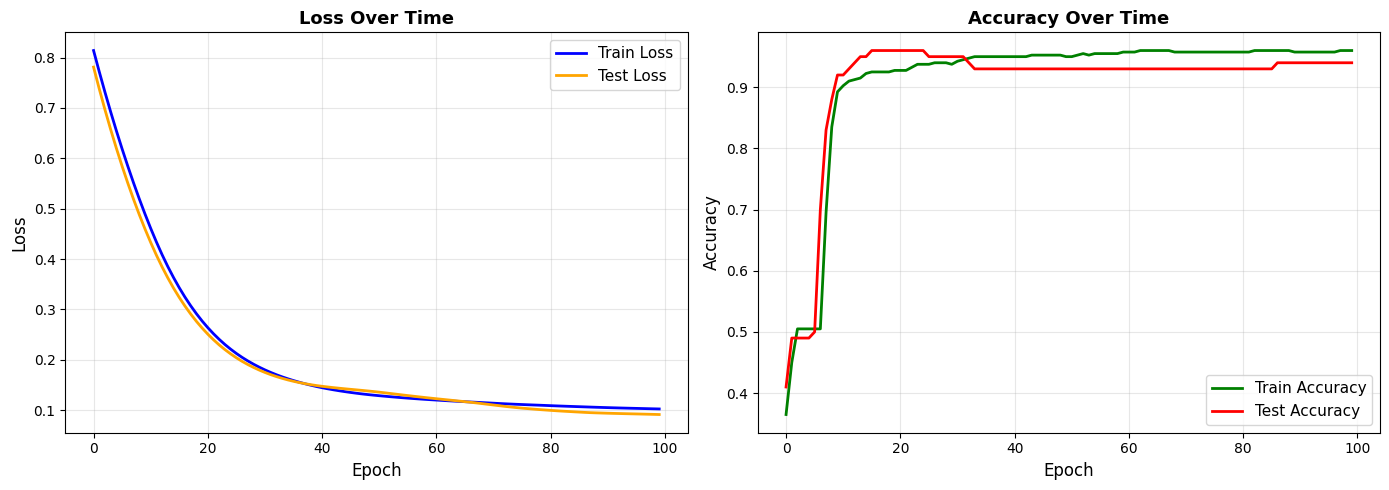


📊 Training Results:
  Final Train Accuracy: 96.00%
  Final Test Accuracy:  94.00%

💡 Good training: Loss decreases, accuracy increases!
💡 Watch for overfitting: If train acc >> test acc, model is memorizing!


In [ ]:
# Visualize training progress
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot - shows how error decreases over time
axes[0].plot(train_losses, label='Train Loss', linewidth=2, color='blue')
axes[0].plot(test_losses, label='Test Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Loss Over Time', fontweight='bold', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy plot - shows how accuracy increases over time
axes[1].plot(train_accs, label='Train Accuracy', linewidth=2, color='green')
axes[1].plot(test_accs, label='Test Accuracy', linewidth=2, color='red')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Accuracy Over Time', fontweight='bold', fontsize=13)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Training Results:")
print(f"  Final Train Accuracy: {train_accs[-1]:.2%}")
print(f"  Final Test Accuracy:  {test_accs[-1]:.2%}")
print(f"\n💡 Good training: Loss decreases, accuracy increases!")
print(f"💡 Watch for overfitting: If train acc >> test acc, model is memorizing!")


---

## Part 5: Optimizers - How We Update Weights 🎯

Different optimizers update weights differently. Let's compare the two most popular:

1. **SGD**: Simple, like walking down a hill
2. **Adam**: Smart, like a ball that adjusts its speed


🔄 Training with SGD (Simple Gradient Descent)...
🔄 Training with Adam (Adaptive Moment Estimation)...


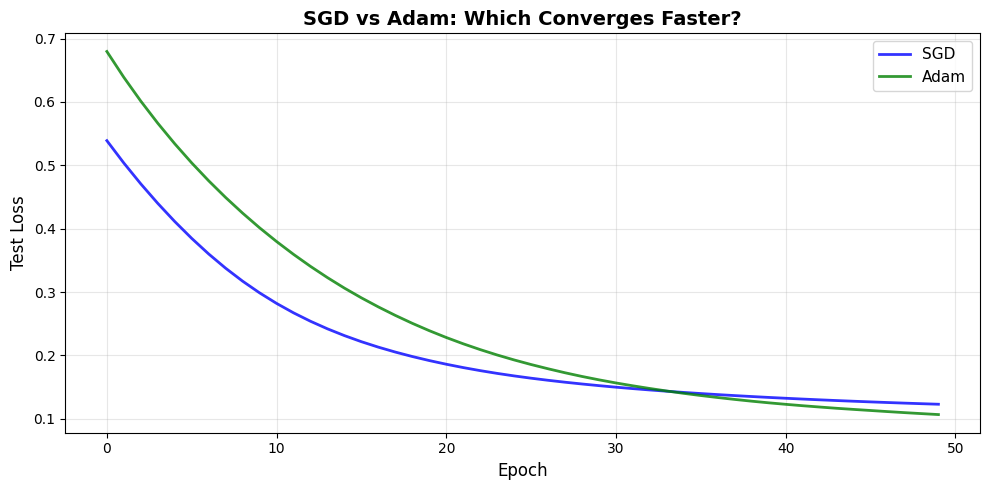


📊 Results:
  SGD final loss: 0.1228
  Adam final loss: 0.1065

💡 Key Insight: Adam usually converges faster (lower loss),
   but SGD can sometimes generalize better to new data!


In [ ]:
# Function to train a model with a specific optimizer
def train_with_optimizer(opt_name, lr, epochs=50):
    """
    Train a model with either SGD or Adam optimizer

    Args:
        opt_name: 'SGD' or 'Adam'
        lr: learning rate (step size for weight updates)
        epochs: number of training iterations
    """
    # Create a fresh model for fair comparison
    model = SimpleNet()

    # Choose optimizer
    if opt_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    else:  # Adam
        optimizer = optim.Adam(model.parameters(), lr=lr)

    criterion = nn.CrossEntropyLoss()
    losses = []  # Track test loss over time

    for epoch in range(epochs):
        # Training step
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            losses.append(test_loss.item())

    return losses

# Train with both optimizers
print("🔄 Training with SGD (Simple Gradient Descent)...")
sgd_losses = train_with_optimizer('SGD', lr=0.1, epochs=50)

print("🔄 Training with Adam (Adaptive Moment Estimation)...")
adam_losses = train_with_optimizer('Adam', lr=0.01, epochs=50)

# Visualize comparison
plt.figure(figsize=(10, 5))
plt.plot(sgd_losses, label='SGD', linewidth=2, alpha=0.8, color='blue')
plt.plot(adam_losses, label='Adam', linewidth=2, alpha=0.8, color='green')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Test Loss', fontsize=12)
plt.title('SGD vs Adam: Which Converges Faster?', fontweight='bold', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print results
print(f"\n📊 Results:")
print(f"  SGD final loss: {sgd_losses[-1]:.4f}")
print(f"  Adam final loss: {adam_losses[-1]:.4f}")
print(f"\n💡 Key Insight: Adam usually converges faster (lower loss),")
print("   but SGD can sometimes generalize better to new data!")


---

## Part 6: Dropout - Preventing Overfitting 🛡️

**Overfitting** = Model memorizes training data but fails on new data

**Dropout** = Randomly turn off some neurons during training (like studying with distractions)


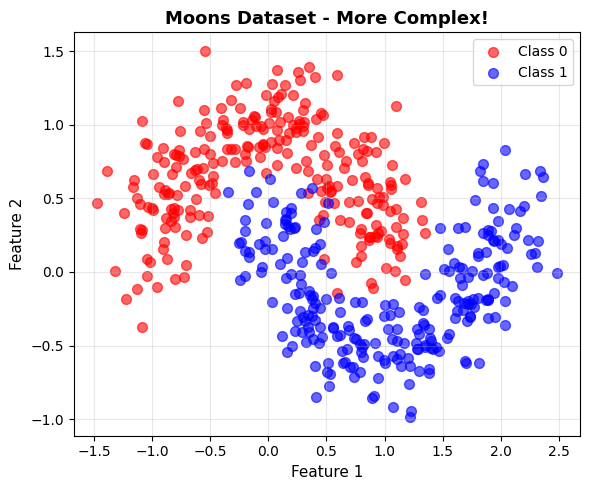

Training samples: 400
Test samples: 100

💡 This dataset is harder - perfect for showing overfitting!


In [ ]:
# Create a more complex dataset (easier to overfit)
# Moons dataset has a non-linear decision boundary - perfect for demonstrating overfitting
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)

# Convert to PyTorch tensors
X_moons_tensor = torch.FloatTensor(X_moons)
y_moons_tensor = torch.LongTensor(y_moons)

# Split into training and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons_tensor, y_moons_tensor, test_size=0.2, random_state=42
)

# Visualize the moons dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1],
            c='red', alpha=0.6, label='Class 0', s=50)
plt.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1],
            c='blue', alpha=0.6, label='Class 1', s=50)
plt.xlabel('Feature 1', fontsize=11)
plt.ylabel('Feature 2', fontsize=11)
plt.title('Moons Dataset - More Complex!', fontweight='bold', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Training samples: {len(X_train_m)}")
print(f"Test samples: {len(X_test_m)}")
print("\n💡 This dataset is harder - perfect for showing overfitting!")


In [ ]:
# Model WITHOUT dropout (will likely overfit)
class NetNoDropout(nn.Module):
    """
    A larger network without dropout - prone to overfitting
    Architecture: 2 → 50 → 50 → 2
    """
    def __init__(self):
        super(NetNoDropout, self).__init__()
        self.fc1 = nn.Linear(2, 50)      # First hidden layer
        self.relu1 = nn.ReLU()           # Activation
        self.fc2 = nn.Linear(50, 50)     # Second hidden layer
        self.relu2 = nn.ReLU()           # Activation
        self.fc3 = nn.Linear(50, 2)     # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Model WITH dropout (will generalize better)
class NetWithDropout(nn.Module):
    """
    Same architecture but WITH dropout to prevent overfitting
    Dropout randomly turns off 50% of neurons during training
    """
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # 50% dropout rate
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)  # 50% dropout rate
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Randomly turn off 50% of neurons (only during training!)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Randomly turn off 50% of neurons
        x = self.fc3(x)
        return x

print("✅ Two models created:")
print("  1. Without dropout (will likely overfit - memorize training data)")
print("  2. With dropout (will generalize better - work on new data)")
print("\n💡 Note: Dropout is ONLY active during training, not during testing!")


✅ Two models created:
  1. Without dropout (will likely overfit - memorize training data)
  2. With dropout (will generalize better - work on new data)

💡 Note: Dropout is ONLY active during training, not during testing!


In [ ]:
# Function to train a model and track metrics
def train_model(model, epochs=100):
    """
    Train a model and return training/test metrics

    Returns:
        train_losses, train_accs, test_losses, test_accs
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate for stability

    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []

    for epoch in range(epochs):
        # ===== TRAINING =====
        model.train()  # Enable dropout (if present)
        train_outputs = model(X_train_m)
        train_loss = criterion(train_outputs, y_train_m)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        train_acc = (torch.argmax(train_outputs, dim=1) == y_train_m).float().mean()

        # ===== TESTING =====
        model.eval()  # Disable dropout (if present)
        with torch.no_grad():
            test_outputs = model(X_test_m)
            test_loss = criterion(test_outputs, y_test_m)
            test_acc = (torch.argmax(test_outputs, dim=1) == y_test_m).float().mean()

        # Store metrics
        train_losses.append(train_loss.item())
        train_accs.append(train_acc.item())
        test_losses.append(test_loss.item())
        test_accs.append(test_acc.item())

    return train_losses, train_accs, test_losses, test_accs

# Train both models
print("🔄 Training model WITHOUT dropout...")
print("   (This model will likely overfit - high train acc, lower test acc)")
model_no_drop = NetNoDropout()
train_loss_nd, train_acc_nd, test_loss_nd, test_acc_nd = train_model(model_no_drop)

print("\n🔄 Training model WITH dropout...")
print("   (This model should generalize better - similar train and test acc)")
model_with_drop = NetWithDropout()
train_loss_d, train_acc_d, test_loss_d, test_acc_d = train_model(model_with_drop)

print("\n✅ Training complete!")


🔄 Training model WITHOUT dropout...
   (This model will likely overfit - high train acc, lower test acc)

🔄 Training model WITH dropout...
   (This model should generalize better - similar train and test acc)

✅ Training complete!


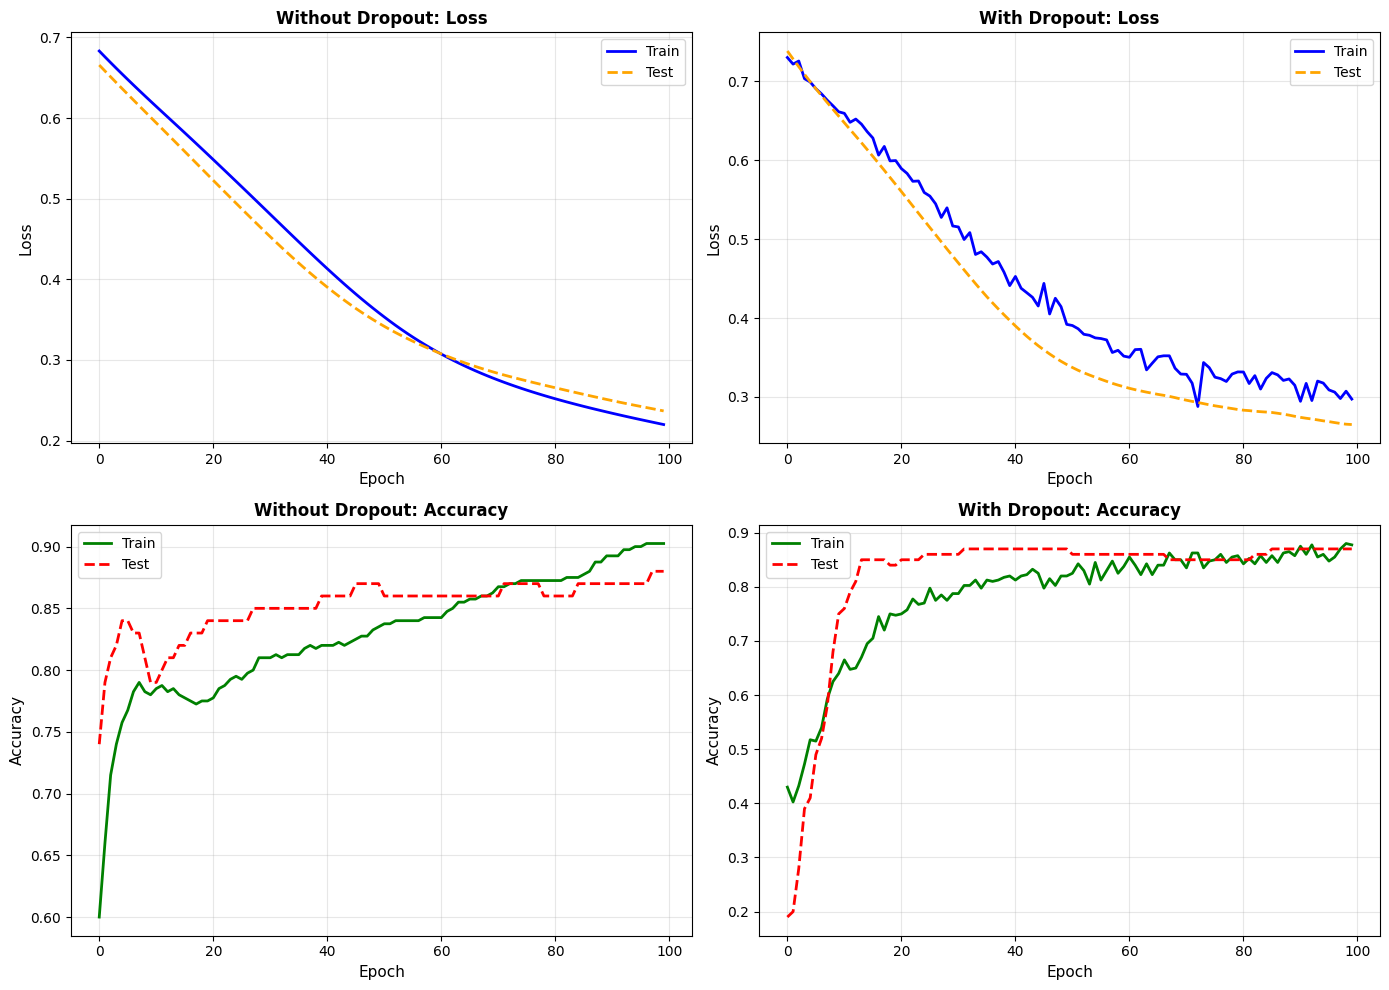


📊 Overfitting Analysis:
Without Dropout:
  Train Accuracy: 90.25%
  Test Accuracy:  88.00%
  Gap (Overfitting): 2.25%

With Dropout:
  Train Accuracy: 87.75%
  Test Accuracy:  87.00%
  Gap (Overfitting): 0.75%

💡 Key Insight: Dropout reduced overfitting by 1.50%!
   Smaller gap = better generalization to new data!


In [ ]:
# Visualize and compare results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loss: No dropout
axes[0, 0].plot(train_loss_nd, label='Train', linewidth=2, color='blue')
axes[0, 0].plot(test_loss_nd, label='Test', linewidth=2, linestyle='--', color='orange')
axes[0, 0].set_title('Without Dropout: Loss', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Loss', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss: With dropout
axes[0, 1].plot(train_loss_d, label='Train', linewidth=2, color='blue')
axes[0, 1].plot(test_loss_d, label='Test', linewidth=2, linestyle='--', color='orange')
axes[0, 1].set_title('With Dropout: Loss', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Epoch', fontsize=11)
axes[0, 1].set_ylabel('Loss', fontsize=11)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Accuracy: No dropout
axes[1, 0].plot(train_acc_nd, label='Train', linewidth=2, color='green')
axes[1, 0].plot(test_acc_nd, label='Test', linewidth=2, linestyle='--', color='red')
axes[1, 0].set_title('Without Dropout: Accuracy', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Epoch', fontsize=11)
axes[1, 0].set_ylabel('Accuracy', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Accuracy: With dropout
axes[1, 1].plot(train_acc_d, label='Train', linewidth=2, color='green')
axes[1, 1].plot(test_acc_d, label='Test', linewidth=2, linestyle='--', color='red')
axes[1, 1].set_title('With Dropout: Accuracy', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Epoch', fontsize=11)
axes[1, 1].set_ylabel('Accuracy', fontsize=11)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate overfitting gap (difference between train and test accuracy)
gap_no_drop = train_acc_nd[-1] - test_acc_nd[-1]
gap_drop = train_acc_d[-1] - test_acc_d[-1]

print("\n📊 Overfitting Analysis:")
print("=" * 50)
print(f"Without Dropout:")
print(f"  Train Accuracy: {train_acc_nd[-1]:.2%}")
print(f"  Test Accuracy:  {test_acc_nd[-1]:.2%}")
print(f"  Gap (Overfitting): {gap_no_drop:.2%}")
print(f"\nWith Dropout:")
print(f"  Train Accuracy: {train_acc_d[-1]:.2%}")
print(f"  Test Accuracy:  {test_acc_d[-1]:.2%}")
print(f"  Gap (Overfitting): {gap_drop:.2%}")
print("=" * 50)
print(f"\n💡 Key Insight: Dropout reduced overfitting by {abs(gap_no_drop - gap_drop):.2%}!")
print("   Smaller gap = better generalization to new data!")


---

## Summary: Key Takeaways 🎓

### What We Learned:

1. **Neural Networks** = Multiple perceptrons working together to solve complex problems
2. **Activation Functions** = Add non-linearity (ReLU is most popular - simple and fast!)
3. **Training Loop** = Forward → Loss → Backward → Update (repeat many times!)
4. **Optimizers** = How we update weights (Adam usually converges faster than SGD)
5. **Dropout** = Prevents overfitting by randomly turning off neurons during training

### The Training Loop (Remember This Pattern!):
```python
for epoch in range(num_epochs):
    # Forward pass: Make predictions
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward pass: Calculate gradients
    optimizer.zero_grad()  # Clear old gradients (CRITICAL!)
    loss.backward()        # Calculate new gradients (backpropagation)
    optimizer.step()       # Update weights using gradients
```

### Common Mistakes to Avoid:
- ❌ **Forgetting `optimizer.zero_grad()`** → Gradients accumulate incorrectly!
- ❌ **Using `model.train()` during testing** → Dropout stays active (wrong behavior)!
- ❌ **Not using `torch.no_grad()` during testing** → Wastes memory and time!

### Key Concepts Recap:

**Overfitting**: Model memorizes training data but fails on new data
- **Sign**: Train accuracy >> Test accuracy
- **Solution**: Use dropout, reduce model size, or get more data

**Backpropagation**: How neural networks learn
- Errors flow backward through the network
- PyTorch does this automatically with `loss.backward()`

**Dropout**: Regularization technique
- Randomly turns off neurons during training
- Forces network to be robust
- Only active during training (not testing!)

### Next Steps to Continue Learning:
- Try different learning rates (0.001, 0.01, 0.1)
- Experiment with different architectures (more layers, different sizes)
- Learn about batch normalization (stabilizes training)
- Explore Convolutional Neural Networks (CNNs) for images
- Try Recurrent Neural Networks (RNNs) for sequences

---

**🎉 Congratulations! You now understand the fundamentals of neural networks!**

You've learned:
- ✅ How neural networks work
- ✅ How to build and train them
- ✅ How to prevent overfitting
- ✅ How to choose optimizers

Keep practicing and experimenting - that's the best way to learn! 🚀
